Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 64)        

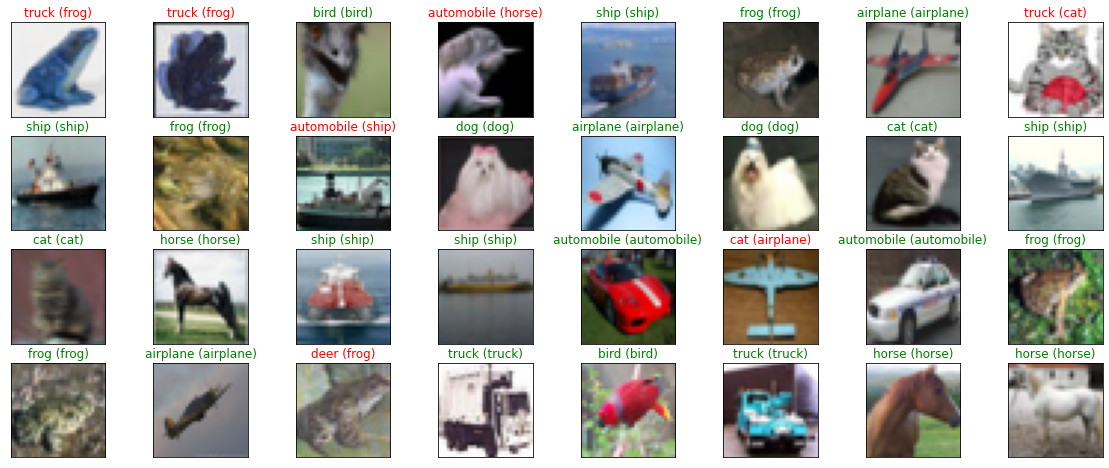

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Scale
scale = 255
x_train = x_train.astype('float32') / scale
x_test = x_test.astype('float32') / scale

# One-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,
                padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 32, kernel_size = 2, 
                 padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, 
                 padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop', metrics = ['accuracy'])

# Start training
hist = model.fit(x_train, y_train, 
                 batch_size = 32, epochs = 5, 
                 verbose = 2, shuffle = True)

# Saving
model.save_weights('cifar10_cnn_model.hdf5')
print("Saving successfully")

# Loading
model.load_weights('cifar10_cnn_model.hdf5')
print("Loading successfully")

# Calculate accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))